In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Ribesh
[nltk_data]     Shrestha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ribesh
[nltk_data]     Shrestha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ribesh
[nltk_data]     Shrestha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Ribesh
[nltk_data]     Shrestha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
# Step 1: Load the dataset
data = pd.read_csv("D:\Data Mining\Data sets for lab report\Stress\Stress.csv", encoding='utf-8')

In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [28]:
data.isna().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
processed_review    0
dtype: int64

In [30]:
data.duplicated().sum()

0

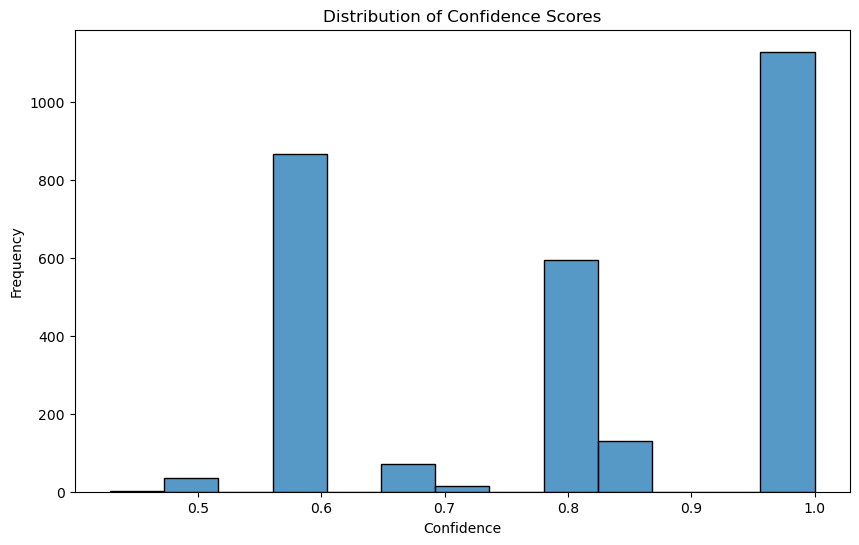

In [52]:
# Histogram: Distribution of Confidence Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['confidence'])
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

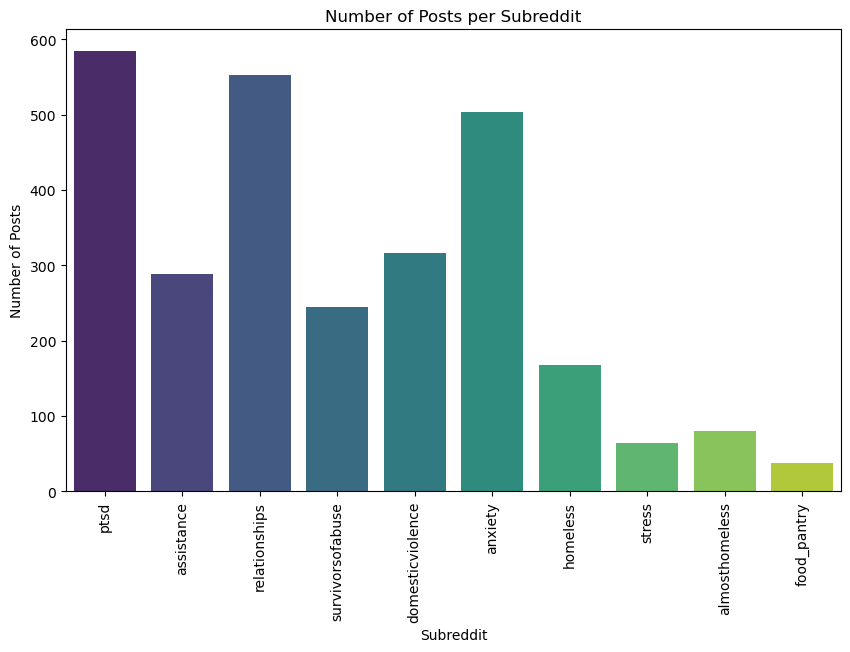

In [58]:
# Bar plot: Count of posts per subreddit
plt.figure(figsize=(10, 6))
sns.countplot(x='subreddit', data=data, palette='viridis')
plt.title('Number of Posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.show()

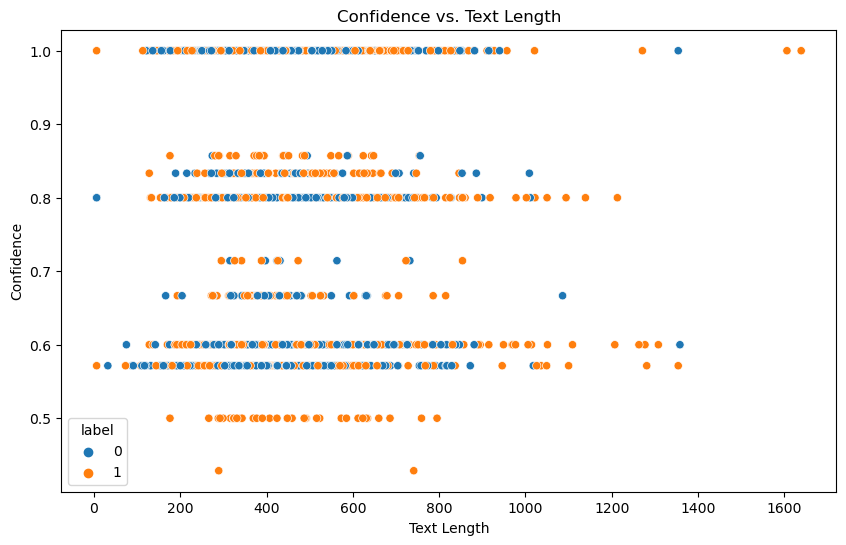

In [66]:
# Scatter plot: Confidence vs. Text Length
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='confidence', hue='label', data=data)
plt.title('Confidence vs. Text Length')
plt.xlabel('Text Length')
plt.ylabel('Confidence')
plt.show()

In [9]:
type(stopwords.words('english'))

list

In [13]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [18]:
# Apply preprocessing to the 'review' column
data['processed_review'] = data['text'].apply(preprocess_text)

In [20]:
data

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,processed_review
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353,said felt way suggeted go rest trigger ahead y...
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817,hey rassistance sure right place post go im cu...
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605,mom hit newspaper shocked would know dont like...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555,met new boyfriend amazing kind sweet good stud...
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005,october domestic violence awareness month dome...
...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044,week ago precious ignored jan happy year preci...
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412,dont ability cope anymore im trying lot thing ...
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312,case first time youre reading post looking peo...
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143,find normal good relationship main problem see...


In [22]:
data[['text','processed_review']].iloc[0]

text                He said he had not felt that way before, sugge...
processed_review    said felt way suggeted go rest trigger ahead y...
Name: 0, dtype: object

In [72]:
# Label encoding
label_encoder = LabelEncoder()
data['encoded_label'] = label_encoder.fit_transform(data['label'])

In [74]:
# Step 3: Split the dataset into training and testing sets
X = data['processed_review']
y = data['encoded_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Step 4: Create a pipeline with TfidfVectorizer and Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.7)),
    ('classifier', MultinomialNB())
])


In [78]:
# Step 5: Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, max_features=5000, min_df=5,
                                 ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [80]:
# Step 6: Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [82]:
# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7341549295774648

Confusion Matrix:
[[160 103]
 [ 48 257]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       263
           1       0.71      0.84      0.77       305

    accuracy                           0.73       568
   macro avg       0.74      0.73      0.73       568
weighted avg       0.74      0.73      0.73       568



In [84]:
# Step 8: Test with new reviews
new_reviews = [
    "This movie was excellent! I loved it.",
    "Terrible film. I hated every minute of it.",
    "An average movie, nothing special."
]

In [86]:
# Preprocess new reviews
processed_new_reviews = [preprocess_text(review) for review in new_reviews]

# Make predictions
new_predictions = pipeline.predict(processed_new_reviews)

for review, sentiment in zip(new_reviews, new_predictions):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")

Review: This movie was excellent! I loved it.
Predicted Sentiment: 0

Review: Terrible film. I hated every minute of it.
Predicted Sentiment: 1

Review: An average movie, nothing special.
Predicted Sentiment: 0

